# 14. 군집분석

군집분석은 속성을 분석하여 서로 비슷한 특징을 갖는 관측값끼리 같은 클러스터로 묶는 방법.   
어느 클러스터에도 속하지 못하는 관측값을 찾을 수 있기 때문에 특이 데이터를 찾는데 활용하기도 함.   

**분류분석과의 비교** 
- 유사점: 관측값을 몇 개의 집단으로 나눈다는 점
- 차이점: 정답이 없는 상태에서 데이터 자체의 유사성만을 기준으로 판단한다는 점

## 1. 군집분석의 이해

### 1-1. 군집분석의 특징

1. 군집분석 = 비지도 학습법
2. 모집단 또는 범주에 대한 **사전정보가 없는 경우**에 사용 (분류분석은 범주에 대한 사전 정보가 주어짐)
3. 각 군집내의 각 개체들은 다른 군집에 속하는 개체들보다 서로 더 유사하도록 주어진 개체들을 여러 군집들로 나누는 것이 목적
4. 각 군집별 특성을 파악함으로써 전체 자료 구조의 이해를 도움
5. 특이값을 갖는 개체의 발견이나 결측값의 보정 등에도 활용

### 1-2. 거리

1. 측도: 관측값들이 서로 얼마나 유사한지 또는 유사하지 않은지를 측정하는 측도가 필요
2. **보통 유사성보다는 비유사성을 이용하여 군집화를 진행**
3. 변수들이 연속형인 경우, 유클리드 거리, 민콥스키 거리, 맨해튼 거리를 사용 [참고](https://medium.com/h-document/클러스터링-군집-분석-계층적-군집-a7cac74beb6c)

### 1-3. 계층적 군집분석

1. 병합방법: 순차적으로 가까운 관측값들끼리 묶어주는 방법 (주로 사용)
2. 분할방법: 먼 관측값들을 나누어가는 방법
3. 군집들간의 거리측정방법
    - 최단연결법: 두 군집 사이의 거리를 각 군집에서 하나씩 관측값을 뽑았을 때 나타날 수 있는 모든 거리의 조합을 최소값을 측정하는 방법 (고립된 군집을 찾는데 중점을 둔 방법, 군비이 고리형태로 연결되어 있는 경우에는 부적절한 결과를 줄 수도 있음)
    - 최장연결법:두 군집 사이의 거리를 각 군집에서 하나씩 관측값을 뽑았을 때 나타날 수 있는 거리의 최대값으로 측정
    - 평균연결법: 한 군집안에 속해 있는 모든 대상과 다른 군집에 속해있는 모든 대상이 쌍집합에 대한 거리를 평균 계산 측정
    
### 1-4. K 평균 군집방법

1. 주어진 군집수 k에 대해서 군집내 거리 제곱합의 합을 최소화 함
2. 사전에 결정된 군집수 k가 주어지면 **유클리드 거리**를 이용하여 전체 자료를 상대적으로 유사한 k개의 군집으로 나눔
3. 계층적 군집방법에 비하여 계산량이 적고 대용량 데이터를 빠르게 처리할 수 있음

**k평균 군집방법의 실시방법**
1. 특성변수의 자료타입에 따라 자료를 변환한 후 특성변수를 표준화 함
2. 군집수 $k$가 주어지면 랜덤하게 초기 군집의 **중심값**을 $\mu_{1}, \dots, \mu_{k}$로 놓음 ($k$의 중심값이 나쁠 경우 군집의 결과가 나쁘게 나타날 수 있음 $\rightarrow$ k-means++로 해결)
3. 유클리디안 거리를 기준으로 각 관측치를 가장 가까운 $\mu_{1}$군집에 편입함
4. 각 군집의 평균을 구해 이들을 새로운 군집의 중심값 $\mu_{1}$로 놓은 후 3단계를 실행함
5. 각 군집의 소속이 변하지 않을 때까지, 또는 미리 정해진 최대 반복횟수에 도달할 때가지 단계 4)를 반복함. 


**k-means++ 초기 중심점을 구하는 방법**
1. $n$개의 표본으로 구성된 학습데이터로부터 1개의 임의 표본을 뽑고 이를 초기 중심값 $\mu_{1}$으로 함.   
2. 나머지 $n-1$개의 자료에 대해 $\mu_{1}$으로부터의 유클리디안 거리를 구하고 이 거리에 비례한 확률을 $n-1$개의 자료 각각에 부여한 후, 이 확률에 비례하여 1개의 임의 표본을 뽑아 이를 두번째 초기 중심값 $\mu_{2}$로 함.   
3. 이와 같은 방법으로 최종 $\mu_{k}$를 구할 때까지 반복함.   


## 2. scipy 및 sklearn 모듈을 활용한 군집분석

군집분석은 거리를 측정하여 데이터간 인접성을 판단하기 때문에 데이터의 단위가 매우 중요함.   
$\rightarrow$ 단위의 크기가 매우 상이하다면 좋은 분석결과가 나타나지 않을 수 있음.   


### 2-1. 입력변수의 표준화
sklearn.preprocessing 모듈의 StandardScaler().fit()함수 이용

> from sklearn.preprocessing import StandardScaler

> 객체명 = StandardScaler().fit(데이터)

함수 분석에 사용되는 데이터를 입력하여 각 데이터의 입력변수별 표준화를 위한 평균과 표준편차를 구함

> 데이터 표준화: 객체명.transform(데이터)

표준화된 데이터를 이용하여 데이터간 거리행렬 및 계층적 군집분석 실시


### 2-2. 데이터간 거리행렬
scipy.spatial.distance 모듈의 pdist()함수 및 squareform()함수 이용

> from scipy.spartial.distance import pdist, squareform

> 데이터간 거리 측정: pdist(데이터, metric='euclidean'/'minkowski'/...)

유클리디안 거리가 기본값으로 설정되어 있음. pdist()함수를 통해 데이터간의 거리를 리스트 형태로 출력.      

> 데이터간 거리 2차원 배열.squareform(거리데이터)

리스트 형태의 자료를 2차원 배열 자료의 형태로 나타내기 위해 squareform()을 사용. 2차원 형태로 배열되어 있지만 데이터 번호가 나타나있지 않아 알아보기 힘들어 pandas 모듈의 DataFrame()함수를 이용하여 데이터프레임 형태로 변환.    

### 2-3. 계층적 군집분석
scipy.cluster.hierarchy 모듈의 linkage()함수 이용

> from scipy.cluster.hierarchy import linkage

> linkage(데이터, method='complete'/'single'/'average', metric='euclidean'/'minkowski'/...)

linkage()함수에 계층적 군집분석에 사용되는 데이터를 입력하고 군집간 거리 측정 방법을 정함.  
- complete: 최장연결법
- single: 최단연결법
- average: 평균연결법

linkage()함수 결과는 4개의 열을 가지는 2차원 배열의 자료를 반환하는데 
- 0번째와 1번째 열: 데이터 행 인덱스 출력
- 2번째 열: 행 인덱스에 따른 데이터간 거리 출력
- 마지막열: 군집이 이루어지는 순서

### 2-4. 덴드로그램
scipy.cluster.hierarchy 모듈의 dendrogram()함수 이용

> from scipy.cluster.hierarchy import dendrogram

> dendrogram(군집분석 과정 데이터, leaf_rotation=행 인덱스 회전 출력, leaf_font_size=행 인덱스 출력 크기)

계층적 군집분석 과정 데이터 입력하여 matplotlib.pyplot 모듈의 함수를 적절하게 이용하여 시각화  

### 2-5. 군집번호 할당
scipy.cluster.hierarchy 모듈의 fcluster()함수 이용

> from scipy.cluster.hierarchy import fcluster

> fcluster(군집분석 과정 데이터, t=군집 구분 거리, criterion='distance')

### 2-6. k평균 군집분석
sklearn.cluster 모듈의 KMeans()함수 이용

> from sklearn.cluster import KMeans

> KMeans(n_cluster=군집수, init='k-means++'/'random').fit(데이터)

* n_cluster: 구하고자 하는 군집의 수인 k를 입력
* init='k-means++': 초기 군집값 문제를 보완한 k-means++를 활용한 k평균 군집분석 방법을 수행
* init='random': 일반적인 k평균 군집분석 방법을 수행

KMeans()함수의 결과 확인  

> 군집 중심값: KMeans객체.cluster_centers_

> 군집 분류값: KMeans객체.predict(데이터)


In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


데이터를 표준화하기 위한 과정이 필요

In [4]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler().fit(X) # 표준화를 위한 평균과 표준편차를 계산

In [7]:
X_std = sc.transform(X)

In [8]:
print(X_std[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [9]:
import pandas as pd

In [10]:
from scipy.spatial.distance import pdist, squareform

In [11]:
row_dist = pd.DataFrame(squareform(pdist(X_std, metric='euclidean')))

In [12]:
print(row_dist)

          0         1         2         3         4         5         6    \
0    0.000000  1.176219  0.845607  1.103685  0.260139  1.038444  0.661331   
1    1.176219  0.000000  0.523373  0.434000  1.386485  2.181206  0.998654   
2    0.845607  0.523373  0.000000  0.283891  0.991572  1.853897  0.497194   
3    1.103685  0.434000  0.283891  0.000000  1.250160  2.100774  0.705317   
4    0.260139  1.386485  0.991572  1.250160  0.000000  0.900113  0.681319   
..        ...       ...       ...       ...       ...       ...       ...   
145  4.170050  4.130727  4.317340  4.311771  4.296127  4.121389  4.349495   
146  4.075223  3.660136  3.973046  3.887869  4.252915  4.357976  4.142182   
147  3.805412  3.746638  3.936541  3.922954  3.935711  3.802866  3.977470   
148  3.826157  4.017345  4.072716  4.097587  3.890518  3.597498  3.982224   
149  3.335064  3.213476  3.380336  3.340154  3.457620  3.433631  3.413235   

          7         8         9    ...       140       141       142  \
0  

In [13]:
from scipy.cluster.hierarchy import linkage

In [14]:
clusters = linkage(y=X_std, method='complete', metric='euclidean') # 'complete' = 최장연결법

In [15]:
clusters[:5]

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00]])

In [16]:
from scipy.cluster.hierarchy import dendrogram

In [17]:
import matplotlib.pyplot as plt

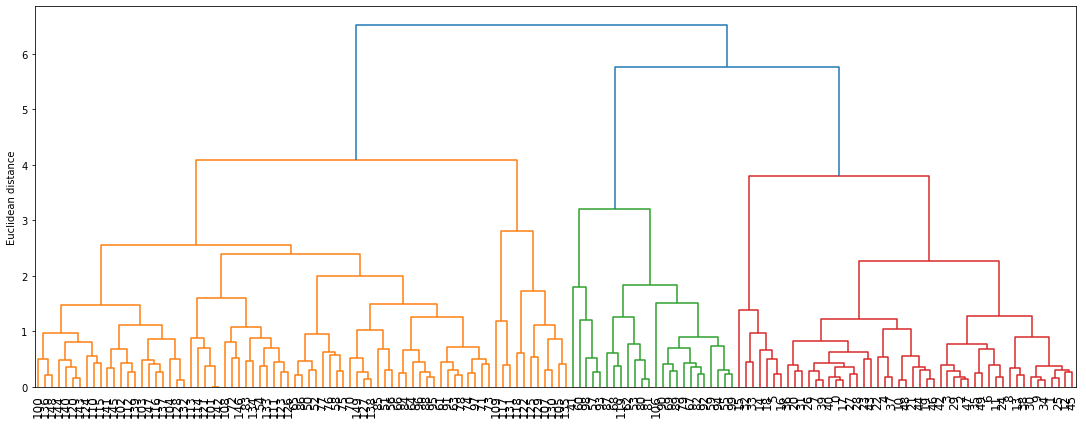

In [18]:
plt.figure(figsize = (15,6))
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

dendrogram으로 확인해보면 거리 5를 기준으로 3개의 군집으로 나눠짐을 알 수 있다.  

In [19]:
from scipy.cluster.hierarchy import fcluster

In [20]:
cut_tree = fcluster(clusters, t=5, criterion='distance')

In [21]:
print(cut_tree)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 2 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 1 2 1 1 1 1 2 2 2 1 1 1 1
 1 1 1 1 1 2 2 2 2 1 1 1 1 2 1 2 2 1 2 2 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [22]:
from scipy.cluster.hierarchy import linkage

In [23]:
clusters1 = linkage(y=X_std, method='single', metric='euclidean') # 'single'=최단연결법

In [24]:
clusters1[:5]

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00]])

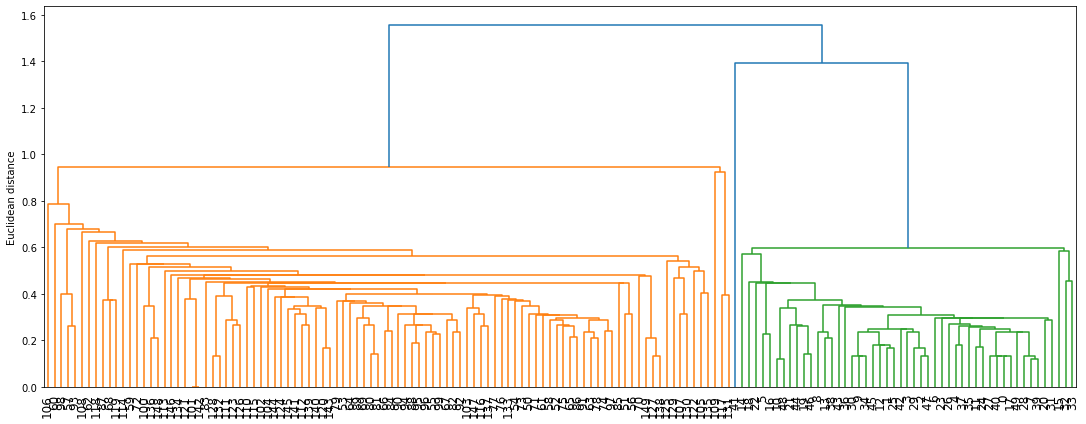

In [25]:
plt.figure(figsize = (15,6))
dendrogram(clusters1, leaf_rotation=90, leaf_font_size=12)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

최단연결법으로 군집분석을 하면 거리 1.2 정도에서 3개의 군집으로 나누어짐을 알 수 있음.    

In [26]:
cut_tree1 = fcluster(clusters1, t=1.2, criterion='distance')

In [27]:
print(cut_tree1)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


결과를 보면 41번째 자료에서 하나만 3번째 군집으로 나눠지는 것이 있음을 확인할 수 있다. (위 덴드로그램에서도 확인가능) 즉 41번째 자료는 이상점이라고 볼 수 있다.   

In [28]:
clusters2 = linkage(y=X_std, method='average', metric='euclidean') # 'average'=평균연결법

In [29]:
clusters2[:5]

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00]])

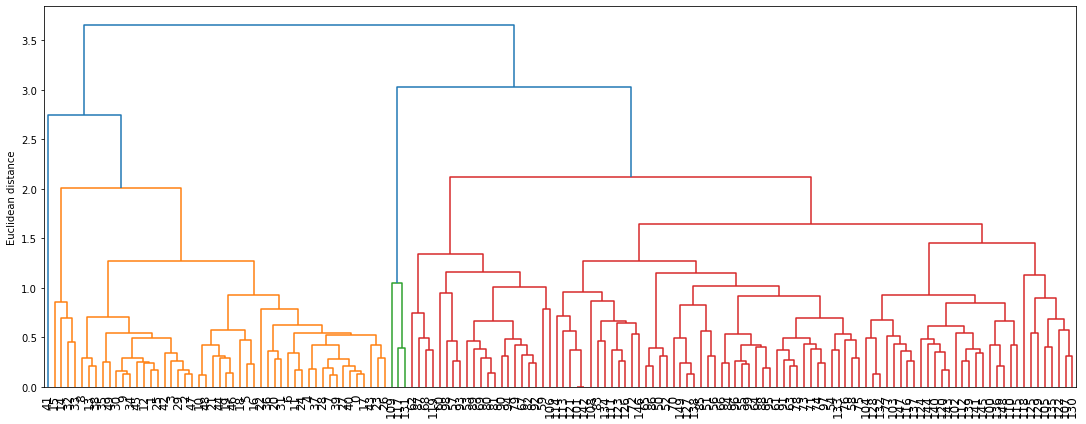

In [30]:
plt.figure(figsize = (15,6))
dendrogram(clusters2, leaf_rotation=90, leaf_font_size=12)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

평균연결법으로 군집분석을 하면 거리 2.8정도에서 3개의 군집으로 나눠짐을 알 수 있음.  

In [31]:
cut_tree2 = fcluster(clusters2, t=2.8, criterion='distance')

In [32]:
print(cut_tree2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


K평균 군집 분석

In [33]:
from sklearn.cluster import KMeans

In [34]:
model = KMeans(n_clusters=3, random_state=123, init='random').fit(X_std)

In [35]:
centers = model.cluster_centers_ # 군집의 중심위치 확인

In [36]:
print(centers)

[[ 1.13140499  0.07903422  0.98537152  0.99908828]
 [-0.06881714 -0.89339955  0.34522179  0.28439302]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]]


In [37]:
pred = model.predict(X_std)

In [38]:
print(pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]


In [39]:
model1 = KMeans(n_clusters=3, random_state=2345, init='k-means++').fit(X_std)

In [40]:
centers1 = model1.cluster_centers_

In [41]:
print(centers)

[[ 1.13140499  0.07903422  0.98537152  0.99908828]
 [-0.06881714 -0.89339955  0.34522179  0.28439302]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]]


In [42]:
pred1 = model1.predict(X_std)

In [43]:
print(pred1)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]


## 실습

### [과제14]
seaborn 모듈의 penguins 데이터에서 species를 예측하기 위해 bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g를 사용한 의사결정나무분석을 실시

In [44]:
import seaborn as sns

In [45]:
df = sns.load_dataset('penguins')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [47]:
df = df.dropna(subset=['species','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'], how='any', axis=0)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [49]:
X = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

In [50]:
sc = StandardScaler().fit(X) # fit: Compute the mean and std to be used for later scaling.

In [51]:
print(X[:5])

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0


In [52]:
type(sc)

sklearn.preprocessing._data.StandardScaler

In [53]:
X_std = sc.transform(X) # transform: Perform standardization by centering and scaling.

In [54]:
print(X_std[:5])

[[-0.88449874  0.78544923 -1.41834665 -0.56414208]
 [-0.81112573  0.1261879  -1.06225022 -0.50170305]
 [-0.66437972  0.43046236 -0.42127665 -1.18853234]
 [-1.32473679  1.08972369 -0.56371522 -0.93877623]
 [-0.84781224  1.74898502 -0.77737308 -0.68902013]]


pdist()함수를 이용하여 거리를 구함

In [55]:
dist = pdist(X_std, metric='euclidean')

In [56]:
dist

array([0.75545509, 1.2483909 , 1.07570354, ..., 1.44813428, 0.80711829,
       1.11595199])

리스트 형태의 자료를 2차원 배열 자료의 형태로 나타내기 위해 squareform()을 사용.

In [57]:
squ = squareform(dist)

In [58]:
squ

array([[0.        , 0.75545509, 1.2483909 , ..., 4.62332981, 3.64921546,
        3.88621596],
       [0.75545509, 0.        , 0.9983481 , ..., 4.15262166, 3.05238179,
        3.42983399],
       [1.2483909 , 0.9983481 , 0.        , ..., 4.27048468, 3.29196414,
        3.58905459],
       ...,
       [4.62332981, 4.15262166, 4.27048468, ..., 0.        , 1.44813428,
        0.80711829],
       [3.64921546, 3.05238179, 3.29196414, ..., 1.44813428, 0.        ,
        1.11595199],
       [3.88621596, 3.42983399, 3.58905459, ..., 0.80711829, 1.11595199,
        0.        ]])

보기쉽게 DataFrame으로 변환

In [59]:
row_dist = pd.DataFrame(squ)

In [60]:
row_dist.head()

,0,1,2,3,4,5,6,7,8,9,...,332,333,334,335,336,337,338,339,340,341
0,0.000000,0.755455,1.248391,1.075704,1.164555,0.483760,1.592829,1.334953,1.289313,1.076023,...,4.858921,3.784271,5.435446,3.441362,4.603728,4.039011,3.837219,4.623330,3.649215,3.886216
1,0.755455,0.000000,0.998348,1.277407,1.658632,0.477309,1.688952,1.233058,1.619720,0.714318,...,4.413954,3.114649,5.006583,2.874185,4.171547,3.386142,3.201489,4.152622,3.052382,3.429834
2,1.248391,0.998348,0.000000,0.976404,1.465765,1.135642,1.966150,1.181193,1.740180,0.912882,...,4.367166,3.084075,5.015394,2.920080,4.330735,3.544491,3.311103,4.270485,3.291964,3.589055
3,1.075704,1.277407,0.976404,0.000000,0.877559,1.232741,1.610554,0.773798,1.482285,1.252623,...,4.814784,3.774464,5.488042,3.386494,4.669457,4.171841,3.920869,4.707812,3.774348,4.056464
4,1.164555,1.658632,1.465765,0.877559,0.000000,1.559954,1.422222,1.615729,0.920783,1.870371,...,4.818297,4.121275,5.431835,3.622482,4.671358,4.449798,4.185173,4.731974,4.003018,4.055544


linkage()함수를 사용하여 계층적 군집분석

In [61]:
clustersA = linkage(X_std, method='complete', metric='euclidean')

In [62]:
print(clustersA[:5])

[[2.25000000e+02 3.11000000e+02 1.08991018e-01 2.00000000e+00]
 [2.60000000e+02 3.12000000e+02 1.08991018e-01 2.00000000e+00]
 [3.50000000e+01 1.06000000e+02 1.26537458e-01 2.00000000e+00]
 [2.66000000e+02 3.02000000e+02 1.31843434e-01 2.00000000e+00]
 [7.50000000e+01 1.42000000e+02 1.32965177e-01 2.00000000e+00]]


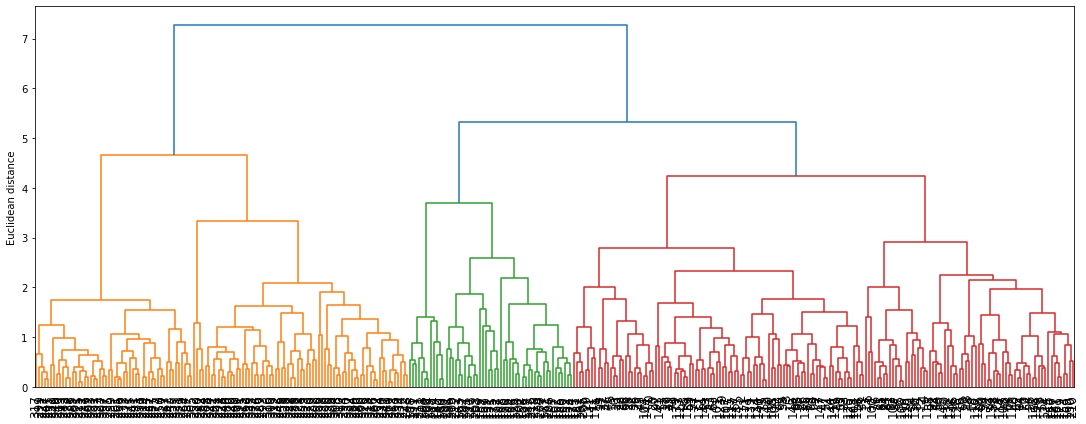

In [63]:
plt.figure(figsize = (15,6))
dendrogram(clustersA, leaf_rotation=90, leaf_font_size=12)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

최장연결법으로 군집분석을 했을 때 거리가 약 4.9정도에서 3개의 군집으로 나눠짐을 확인할 수 있음.   

In [64]:
cut_treeA = fcluster(clustersA, t=4.9, criterion='distance')

In [65]:
print(cut_treeA)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 2 2 3 2 3 2 2 3 2 3 2 2 2 2 2 2 2 3 2 3 2 3 2 2 2 2 2 3 2 3 2 3 2
 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 3 2 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [66]:
clustersB = linkage(X_std, method='single', metric='euclidean')

In [67]:
clustersB[:5]

array([[2.25000000e+02, 3.11000000e+02, 1.08991018e-01, 2.00000000e+00],
       [2.60000000e+02, 3.12000000e+02, 1.08991018e-01, 2.00000000e+00],
       [3.50000000e+01, 1.06000000e+02, 1.26537458e-01, 2.00000000e+00],
       [2.66000000e+02, 3.02000000e+02, 1.31843434e-01, 2.00000000e+00],
       [7.50000000e+01, 1.42000000e+02, 1.32965177e-01, 2.00000000e+00]])

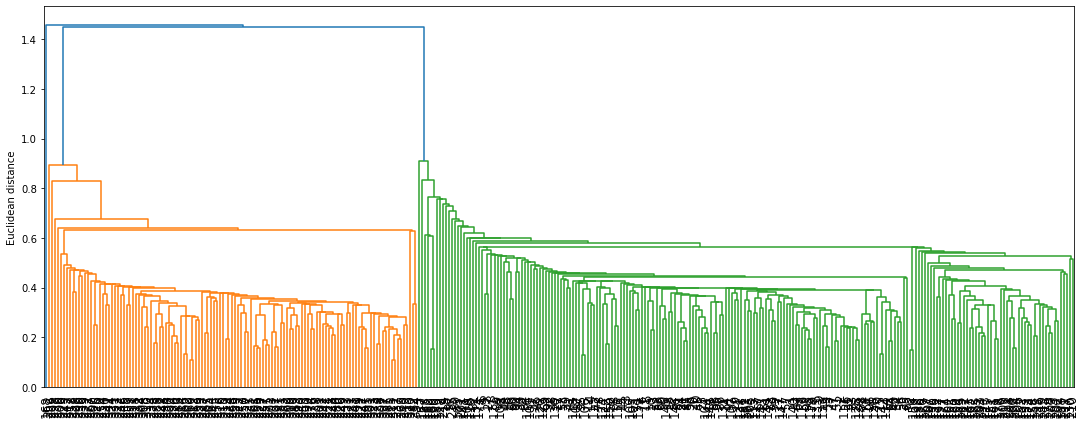

In [68]:
plt.figure(figsize = (15,6))
dendrogram(clustersB, leaf_rotation=90, leaf_font_size=12)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

최소연결법으로 군집분석을 하면 거리가 약 1.0에서 2개의 군집으로 나눠짐을 확인할 수 있음

In [69]:
cut_treeB = fcluster(clustersB, t=1.0, criterion='distance')

In [70]:
print(cut_treeB)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [71]:
clustersC = linkage(X_std, method='average', metric='euclidean')

In [72]:
clustersC[:5]

array([[2.25000000e+02, 3.11000000e+02, 1.08991018e-01, 2.00000000e+00],
       [2.60000000e+02, 3.12000000e+02, 1.08991018e-01, 2.00000000e+00],
       [3.50000000e+01, 1.06000000e+02, 1.26537458e-01, 2.00000000e+00],
       [2.66000000e+02, 3.02000000e+02, 1.31843434e-01, 2.00000000e+00],
       [7.50000000e+01, 1.42000000e+02, 1.32965177e-01, 2.00000000e+00]])

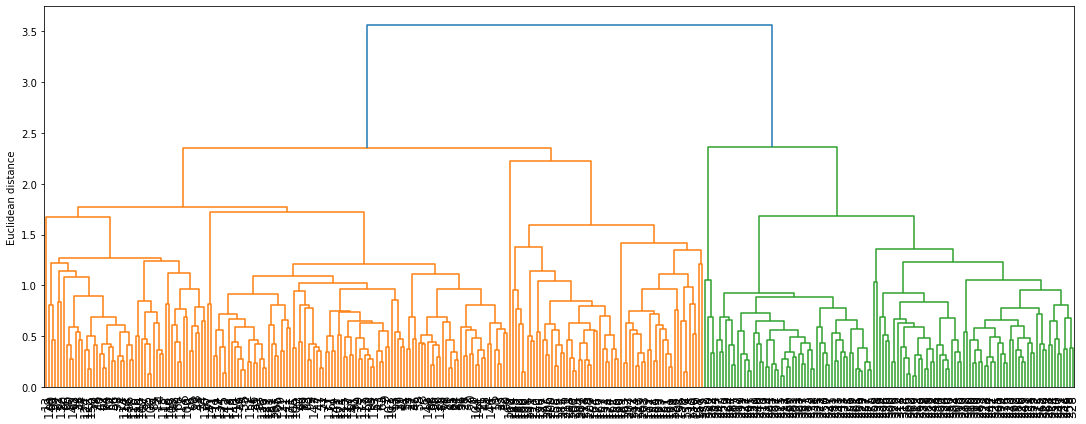

In [73]:
plt.figure(figsize = (15,6))
dendrogram(clustersC, leaf_rotation=90, leaf_font_size=12)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

평균연결법으로 군집분석을 하면 거리가 약 2.5에서 2개의 군집으로 나눠짐을 확인할 수 있음.   

In [74]:
cut_treeC = fcluster(clustersC, t=2.5, criterion='distance')

In [75]:
print(cut_treeC)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


K-means 군집분석

In [76]:
modelA = KMeans(n_clusters=3, random_state=1234, init='random').fit(X_std)

In [77]:
centerA = modelA.cluster_centers_

In [78]:
centerA

array([[ 0.66097295,  0.8169259 , -0.28620559, -0.37431308],
       [ 0.65722922, -1.09998045,  1.15886506,  1.0917612 ],
       [-1.04805941,  0.48655336, -0.89121603, -0.77061658]])

In [79]:
predA = modelA.predict(X_std)

In [80]:
print(predA)

[2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2
 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 0
 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [81]:
modelB = KMeans(n_clusters=3, random_state=2345, init='k-means++').fit(X_std)

In [82]:
centerB = modelB.cluster_centers_

In [83]:
centerB

array([[ 0.66097295,  0.8169259 , -0.28620559, -0.37431308],
       [-1.04805941,  0.48655336, -0.89121603, -0.77061658],
       [ 0.65722922, -1.09998045,  1.15886506,  1.0917612 ]])

In [84]:
predB = modelB.predict(X_std)

In [85]:
print(predB)

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
